# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [12]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

clases = {
    0: 'Windows',
    1: 'Linux',
    2: 'Mac'
}

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [11]:
dataframe.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [6]:
dataframe.dtypes

duracion    float64
paginas       int64
acciones      int64
valor         int64
clase         int64
dtype: object

In [9]:
dataframe.paginas.value_counts()

1    80
2    55
3    11
4    10
5     7
6     4
9     2
7     1
Name: paginas, dtype: int64

In [10]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


<AxesSubplot: >

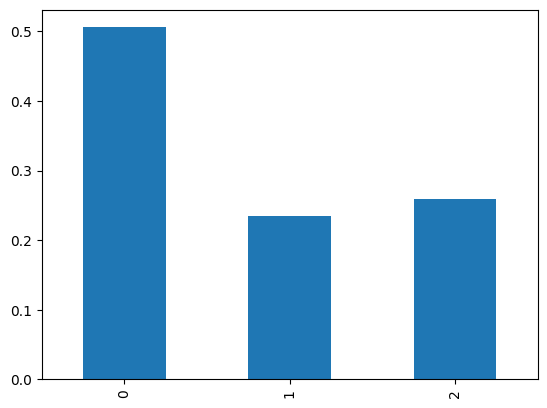

In [17]:
dataframe["clase"].value_counts(normalize=True).sort_index().plot(kind="bar")

In [13]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

C:\Users\alber\AppData\Local\Temp\ipykernel_30416\411264922.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['clase'], 1).hist()


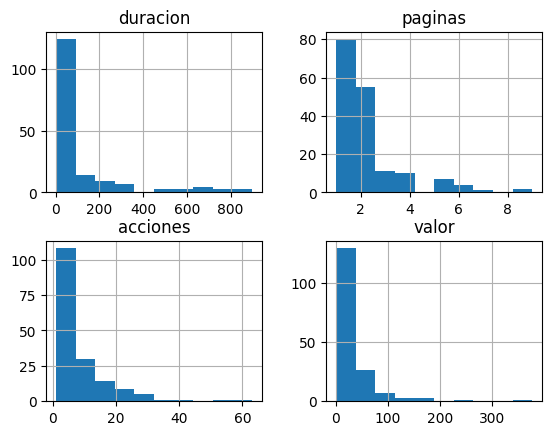

In [18]:
dataframe.drop(['clase'], 1).hist()
plt.show()

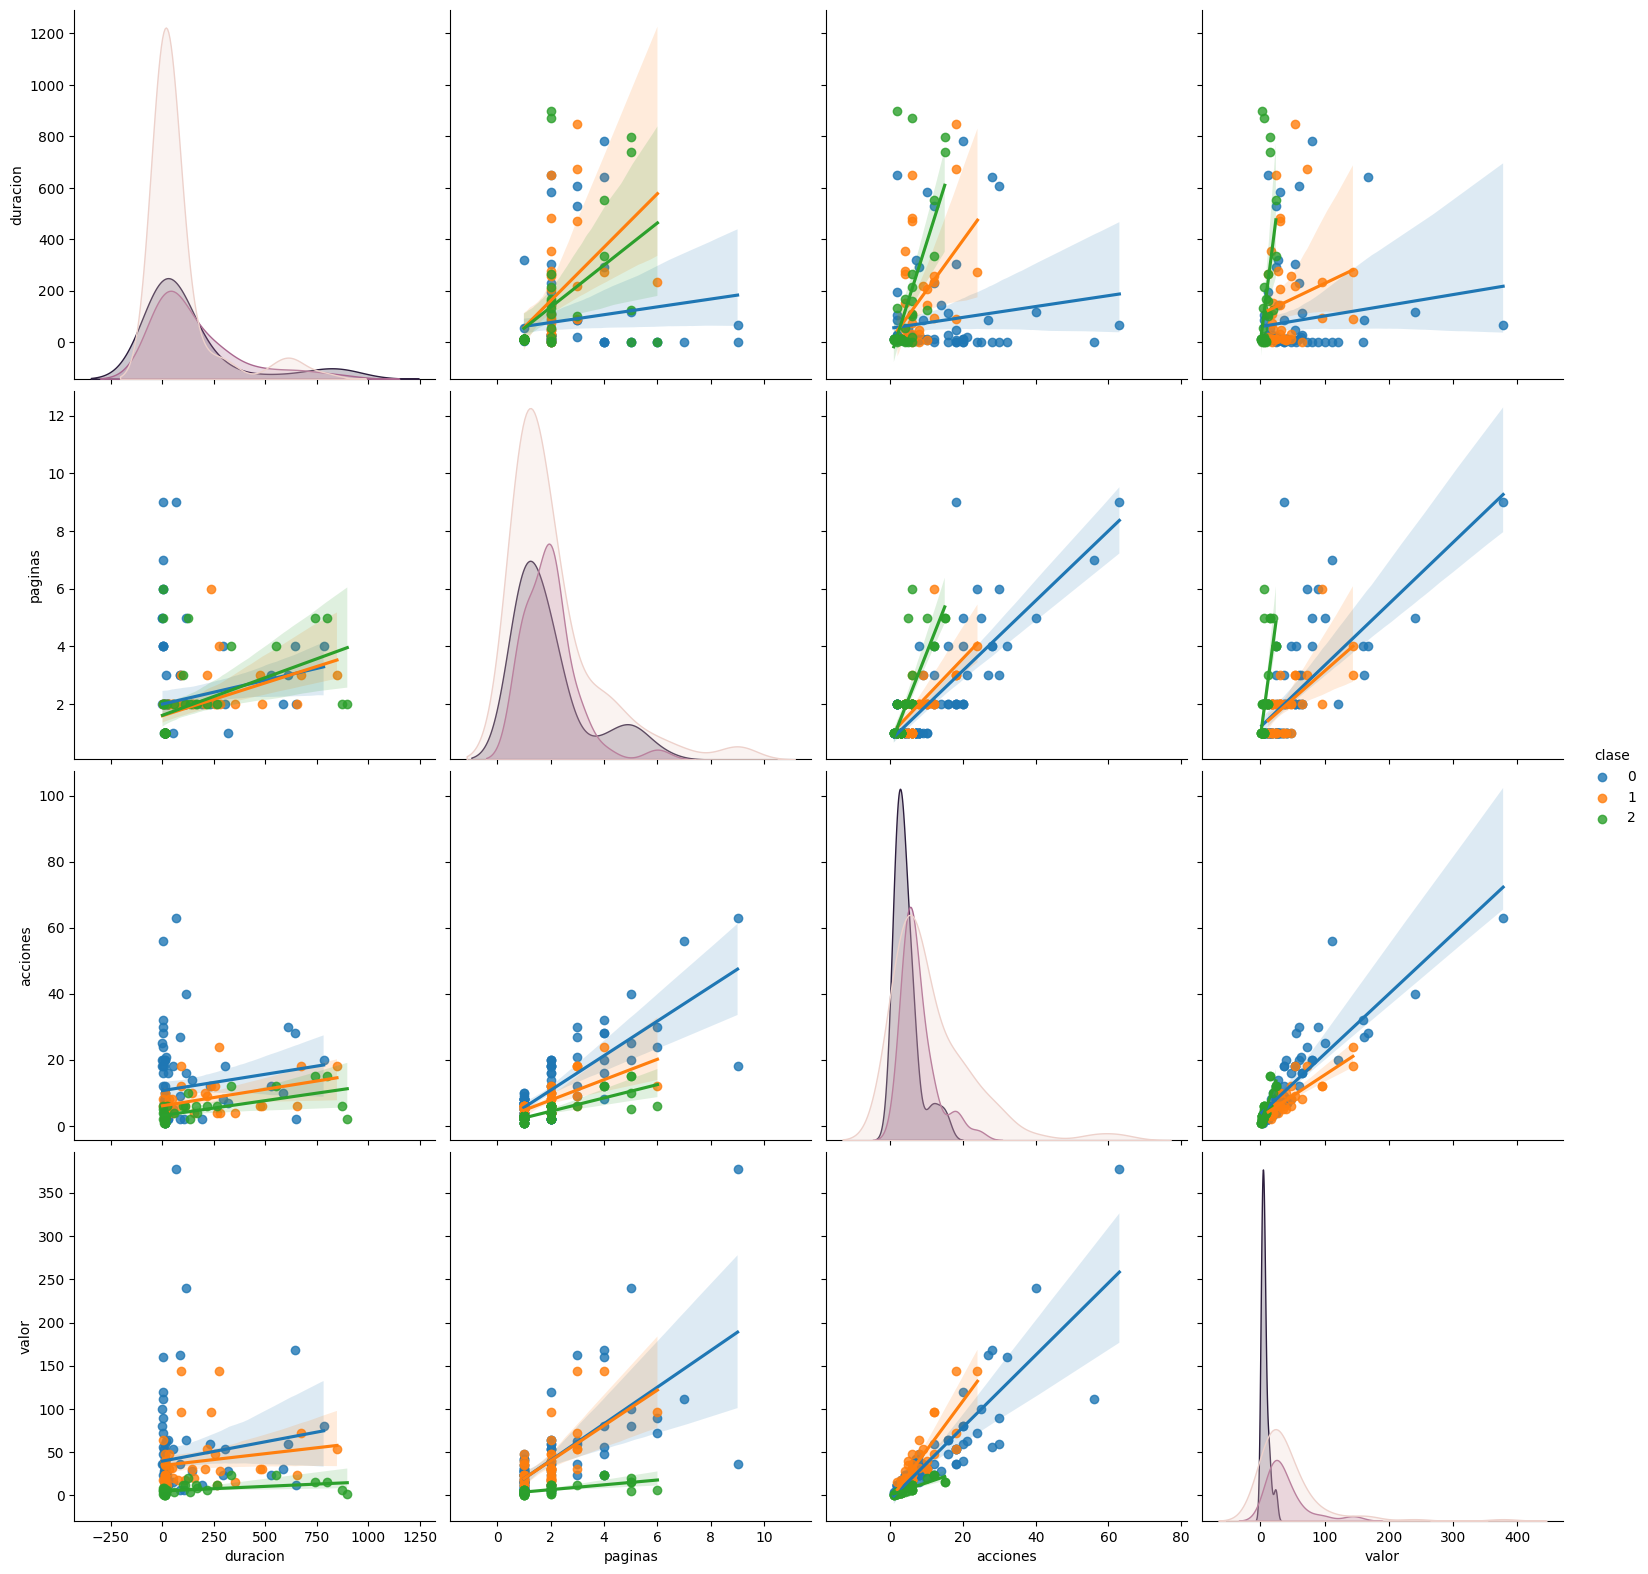

In [19]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

## Creamos el modelo

In [20]:
dataframe.drop(['clase'], 1)

C:\Users\alber\AppData\Local\Temp\ipykernel_30416\2363209366.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['clase'], 1)


,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [21]:
X = dataframe.copy()
X = X.drop(columns="clase")

y = dataframe["clase"].copy()

print(X.shape, y.shape)

(170, 4) (170,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(136, 4) (34, 4)
(136,) (34,)


In [26]:
print(X_train.mean(axis=0))
print(X_test.mean(axis=0))

print(X_train.std(axis=0))
print(X_test.std(axis=0))

[-2.61228947e-17  8.81647696e-17  2.93882565e-17 -6.85725986e-17]
[-0.08525966 -0.0339474  -0.12347978 -0.07973807]
[1. 1. 1. 1.]
[0.78921034 0.93274383 0.62571539 0.63942402]


In [27]:
y_train

119    2
92     0
98     1
152    0
155    0
      ..
9      2
103    1
67     0
117    2
47     1
Name: clase, Length: 136, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [37]:
clf.coef_

array([[-0.35870929, -0.34256359,  1.10652623,  0.93609359],
       [ 0.17597924, -0.08186006, -0.69568234,  2.00270842],
       [ 0.18273005,  0.42442366, -0.41084389, -2.93880201]])

In [38]:
X_test

array([[-0.48452978, -0.69349689, -0.51134265, -0.45133297],
       [-0.48452978, -0.69349689, -0.09923835, -0.3671048 ],
       [-0.48452978, -0.69349689, -0.20226443, -0.11442026],
       [-0.47976328, -0.0339474 ,  0.31286595,  0.05403609],
       [-0.43686479, -0.0339474 , -0.3052905 , -0.19864844],
       [-0.48929628, -0.69349689, -0.09923835, -0.19864844],
       [ 0.22567854, -0.0339474 , -0.3052905 , -0.45133297],
       [-0.48452978, -0.69349689, -0.7173948 , -0.3671048 ],
       [-0.48929628, -0.69349689, -0.61436873, -0.57767524],
       [-0.49406278, -0.69349689, -0.7173948 , -0.61978933],
       [-0.48452978, -0.69349689, -0.7173948 , -0.45133297],
       [ 0.04931809,  1.94470106,  0.1068138 , -0.28287662],
       [-0.53676584,  2.60425055,  1.54917885,  0.81208969],
       [-0.49406278, -0.69349689, -0.40831658,  0.13826427],
       [-0.45116429,  0.62560209,  1.24010063,  0.62257629],
       [-0.38919981, -0.0339474 , -0.09923835,  0.30672062],
       [-0.13657537,  0.

In [39]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2], dtype=int64)

In [40]:
clf.predict_proba(X_test).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2], dtype=int64)

# Adicional: Validación del Modelo

In [41]:
from sklearn import model_selection
name='Logistic Regression'
# kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.64285714 0.64285714 0.71428571 0.64285714 0.64285714 0.5
 0.61538462 0.84615385 0.69230769 0.61538462]
Logistic Regression: 0.655495 (0.083185)


In [42]:
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.7058823529411765
MACRO PRECISION: 0.8047138047138046
MICRO RECALL: 0.7058823529411765
MACRO RECALL: 0.6833333333333332
MICRO ACCURACY: 0.7058823529411765


In [48]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1,Predicho 2
Real 0,14,0,2
Real 1,7,3,0
Real 2,1,0,7


In [ ]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

## Reporte de Resultados

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        16
           1       1.00      0.30      0.46        10
           2       0.78      0.88      0.82         8

    accuracy                           0.71        34
   macro avg       0.80      0.68      0.67        34
weighted avg       0.78      0.71      0.68        34



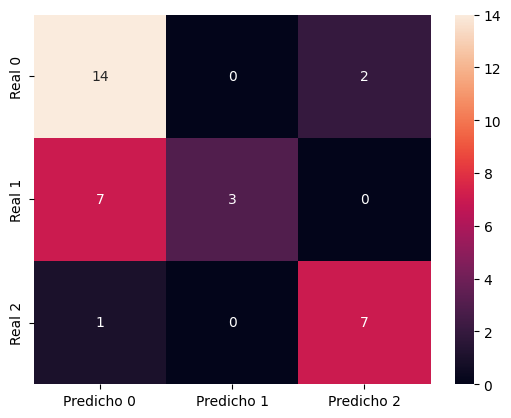

In [60]:
import seaborn as sns
sns.heatmap(cm, annot=True);

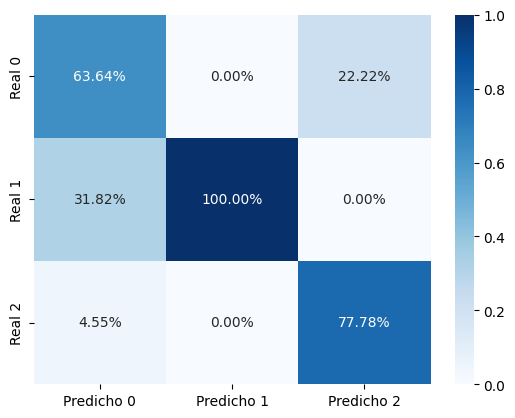

In [61]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [62]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [68]:
new_data = sc.transform(np.array([[1, 1, 1, 2]]))
print(clf.predict_proba(new_data))
print(clf.predict(new_data))

[[0.28180887 0.15687275 0.56131838]]
[2]


c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
new_data = sc.transform(np.array([[111, 2, 8.7, 32.7]]))
print(clf.predict_proba(new_data))
print(clf.predict(new_data))

[[0.6557564  0.27372071 0.07052288]]
[0]


c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
df_coefs

,duracion,paginas,acciones,valor
0,-0.358709,-0.342564,1.106526,0.936094
1,0.175979,-0.081860,-0.695682,2.002708
2,0.182730,0.424424,-0.410844,-2.938802


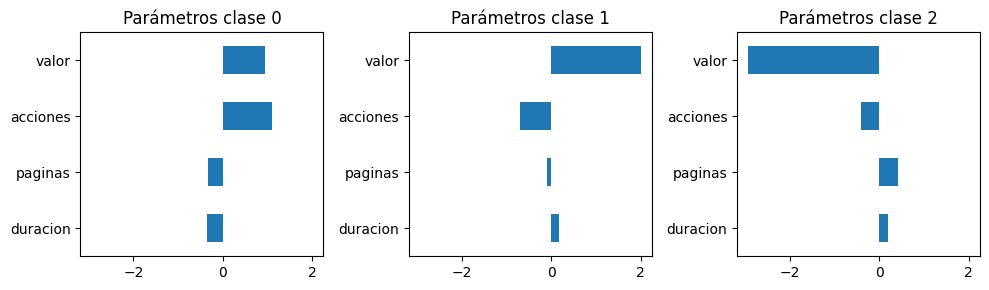

In [84]:
df_coefs = pd.DataFrame(clf.coef_, columns=X.columns)

fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
for i, subdf in df_coefs.iterrows():
    subdf.plot(kind="barh", ax=ax[i])
    ax[i].set_title(f"Parámetros clase {i}")

fig.tight_layout()

In [86]:
dataframe.groupby("clase").mean()

,duracion,paginas,acciones,valor
clase,,,,
0,79.033663,2.127907,11.465116,43.174419
1,156.234550,1.950000,7.650000,38.875000
2,132.649932,1.954545,4.340909,6.522727


In [88]:
new_data = sc.transform(np.array([[111, 2, 8.7, 0.5]]))
print(clf.predict_proba(new_data))
print(clf.predict(new_data))

[[0.37166691 0.07527235 0.55306075]]
[2]


c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Yellowbricks

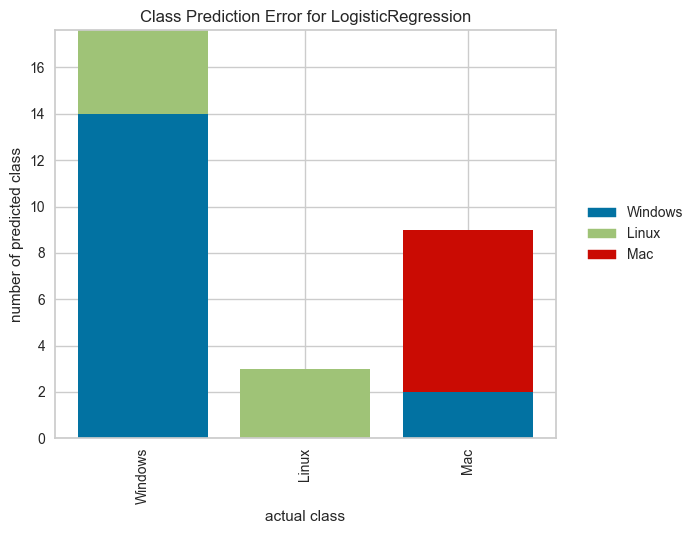

In [89]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    clf, classes = list(clases.values())
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();